**UNAD**

**Luisa Fernanda Santos**

**Dataset Titanic - Regresión Logística**

In [4]:
#Cargar las librerias necesrias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegression -> Librería para Regresión Lineal
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
# lectura de datos en Python y lo cargamos en la variable Datos
Datos = pd.read_csv('Titanic-Dataset.csv')

In [6]:
Data=Datos.drop(['Name','Sex','Ticket','Cabin','Embarked'], axis=1)

In [7]:
# Realizamos lectura de los Datos para el análisis exploratorio

Data.head(50)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
5,6,0,3,NaN,0,0,8.4583
6,7,0,1,54.0,0,0,51.8625
7,8,0,3,2.0,3,1,21.0750
8,9,1,3,27.0,0,2,11.1333
9,10,1,2,14.0,1,0,30.0708


In [8]:
# Descripción de los datos
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#Revisión de datos faltantes
print("Cantidad de Registros con null en Age: ",Data['Age'].isnull().sum())

Cantidad de Registros con null en Age:  177


In [10]:
# Reemplazar todos los null con el valor medio (promedio) de la columna.
#lista de columnas de tipo int
columnas_enteras = ['Age']

# Ciclo for para reemplazar los valores nulos por la media en cada columna de tipo entero
for columna in columnas_enteras:
    media = Data[columna].mean()  # Calcula la media para la columna actual
    Data[columna].fillna(media, inplace=True)  # Reemplaza los valores nulos por la media

In [11]:
print("Cantidad de Registros con null en Edad: ",Data['Age'].isnull().sum())

Cantidad de Registros con null en Edad:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

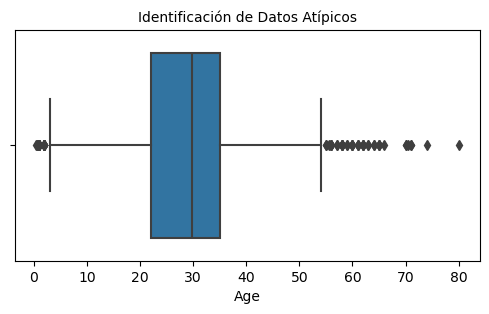

In [12]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['Age'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [13]:
#Conteo de Datos Atípicos

nivel_minimo=1
nivel_maximo=99
Total_Atipicos=((Data['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 7


In [14]:
# Filtra Datos Atípicos

Data=Data[(Data['Age']<nivel_maximo)&(Data['Age']>nivel_minimo)]

In [15]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((Data['Age']<nivel_minimo)|(Data['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [16]:
#Revisión del tipo de datos y datos faltantes

Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 877 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  877 non-null    int64  
 1   Survived     877 non-null    int64  
 2   Pclass       877 non-null    int64  
 3   Age          877 non-null    float64
 4   SibSp        877 non-null    int64  
 5   Parch        877 non-null    int64  
 6   Fare         877 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 54.8 KB


In [17]:
# Total de personas que sobrevivieron

Data['Survived'].value_counts()

Survived
0    547
1    330
Name: count, dtype: int64

In [18]:
Data[['Survived']].head(40)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


In [19]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Data.drop('Survived',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = Data['Survived'] # Se cargan los datos de train con los datos de la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [20]:
print (X_train)

     PassengerId  Pclass        Age  SibSp  Parch     Fare
349          350       3  42.000000      0      0   8.6625
511          512       3  29.699118      0      0   8.0500
192          193       3  19.000000      1      0   7.8542
512          513       1  36.000000      0      0  26.2875
111          112       3  14.500000      1      0  14.4542
..           ...     ...        ...    ...    ...      ...
696          697       3  44.000000      0      0   8.0500
873          874       3  47.000000      0      0   9.0000
412          413       1  33.000000      1      0  90.0000
468          469       3  29.699118      0      0   7.7250
224          225       1  38.000000      1      0  90.0000

[657 rows x 6 columns]


In [21]:
print (Y_train)

349    0
511    0
192    1
512    1
111    0
      ..
696    0
873    0
412    1
468    0
224    1
Name: Survived, Length: 657, dtype: int64


In [22]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [23]:
print (Y_test)

614    0
481    0
291    1
889    1
216    1
      ..
343    0
272    1
359    1
639    0
148    0
Name: Survived, Length: 220, dtype: int64


In [24]:
print (Prediccion)

[0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0
 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1
 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [25]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79       137
           1       0.68      0.46      0.55        83

    accuracy                           0.71       220
   macro avg       0.70      0.66      0.67       220
weighted avg       0.71      0.71      0.70       220



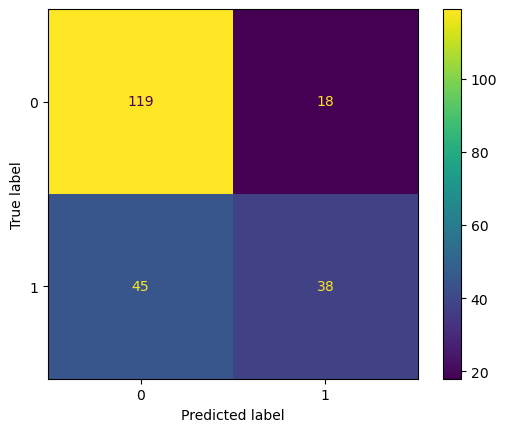

In [26]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

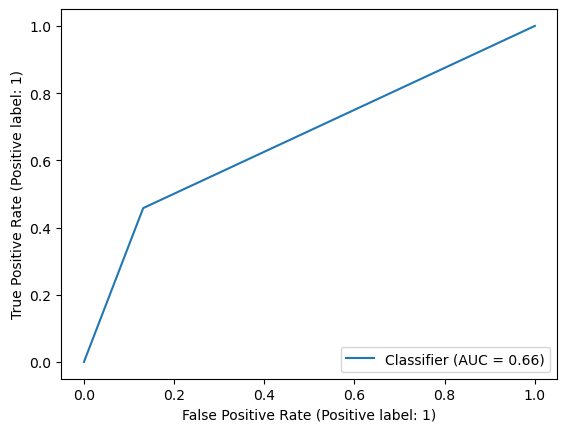

In [28]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()